In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

%load_ext autoreload
%autoreload 2

def plot_preds(train, test, pred_dict, model_name, show_samples=False, scaler = None):
    pred = pred_dict['median']
    pred = pd.Series(pred, index=test.index)
    print(pred)
    if scaler != None:
        pred = pd.Series(scaler.inverse_transform(pred.to_frame()), index = test.index)
    plt.figure(figsize=(8, 6), dpi=100)
    plt.plot(train, color='black')
    plt.plot(test, label='Truth', color='black')
    plt.plot(pred, label=model_name, color='purple')
    # # shade 90% confidence interval
    # samples = pred_dict['samples']
    # lower = np.quantile(samples, 0.05, axis=0)
    # upper = np.quantile(samples, 0.95, axis=0)
    # plt.fill_between(pred.index, lower, upper, alpha=0.3, color='purple')
    # if show_samples:
    #     samples = pred_dict['samples']
    #     # convert df to numpy array
    #     samples = samples.values if isinstance(samples, pd.DataFrame) else samples
    #     for i in range(min(10, samples.shape[0])):
    #         plt.plot(pred.index, samples[i], color='purple', alpha=0.3, linewidth=1)
    plt.legend(loc='upper left')
    if 'NLL/D' in pred_dict:
        nll = pred_dict['NLL/D']
        if nll is not None:
            plt.text(0.03, 0.85, f'NLL/D: {nll:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
    plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## wanT

[('SACR', 'SUNN'), ('SACR', 'JGI'), ('SACR', 'DENV'), ('SACR', 'SNLL'), ('SUNN', 'SACR'), ('SUNN', 'LLNL'), ('SUNN', 'LSVN'), ('SUNN', 'SLAC'), ('SUNN', 'ELPA'), ('SUNN', 'NERSC'), ('LOND', 'NEWY'), ('LOND', 'AOFA'), ('LOND', 'AMST'), ('NEWY', 'LOND'), ('NEWY', 'BNL'), ('NEWY', 'AOFA'), ('NEWY', 'BOST'), ('JGI', 'SACR'), ('HOUS', 'PANTEX'), ('HOUS', 'NASH'), ('HOUS', 'ELPA'), ('HOUS', 'KANS'), ('PANTEX', 'HOUS'), ('BOIS', 'PNWG'), ('BOIS', 'DENV'), ('PNWG', 'BOIS'), ('PNWG', 'DENV'), ('DENV', 'NREL'), ('DENV', 'LSVN'), ('DENV', 'PNWG'), ('DENV', 'KANS'), ('DENV', 'BOIS'), ('DENV', 'SACR'), ('DENV', 'ALBQ'), ('NREL', 'DENV'), ('CHIC', 'WASH'), ('CHIC', 'KANS'), ('CHIC', 'STAR'), ('CHIC', 'ECHI'), ('CHIC', 'NASH'), ('WASH', 'CHIC'), ('WASH', 'PPPL'), ('WASH', 'EASH'), ('WASH', 'CERN-513'), ('WASH', 'NASH'), ('WASH', 'AOFA'), ('WASH', 'ATLA'), ('LLNL', 'SUNN'), ('LSVN', 'SUNN'), ('LSVN', 'DENV'), ('KANS', 'CHIC'), ('KANS', 'DENV'), ('KANS', 'HOUS'), ('STAR', 'CHIC'), ('STAR', 'ANL'), ('ST

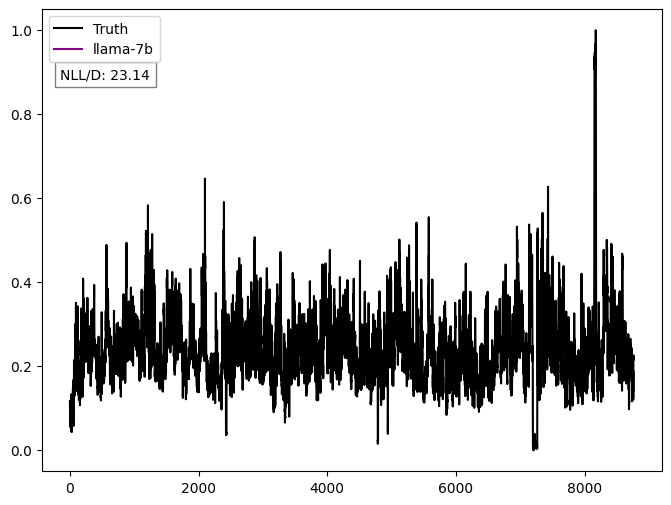

In [36]:
from data.wanT import get_want_dataset, get_scaled_dataset

output_dir = 'outputs/wanT'
datasets, scaler = get_want_dataset()
# datasets = get_want_dataset()
for ds_name, data in datasets.items():
    print(ds_name)
    data = datasets[ds_name]
    train, test = data
    with open(f'{output_dir}/{ds_name}1.pkl', 'rb') as f:
        out = pickle.load(f)
    for model in out:
        try:
            print(out[model]) 
            plot_preds(train, test, out[model], model, show_samples=True)
        except:
            print('Skipping ' + model)

## Darts

AirPassengersDataset


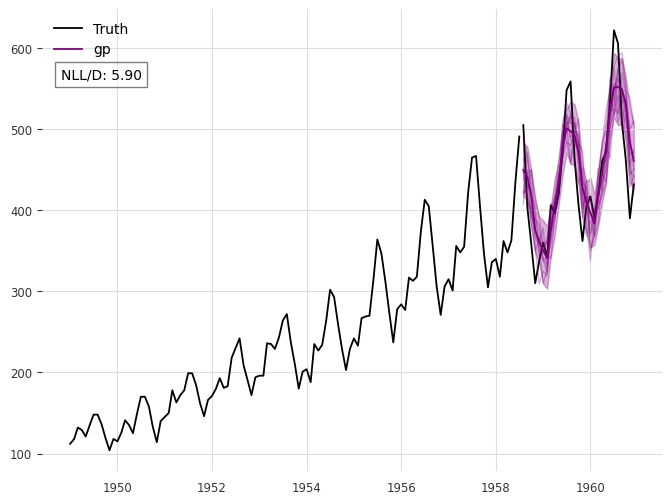

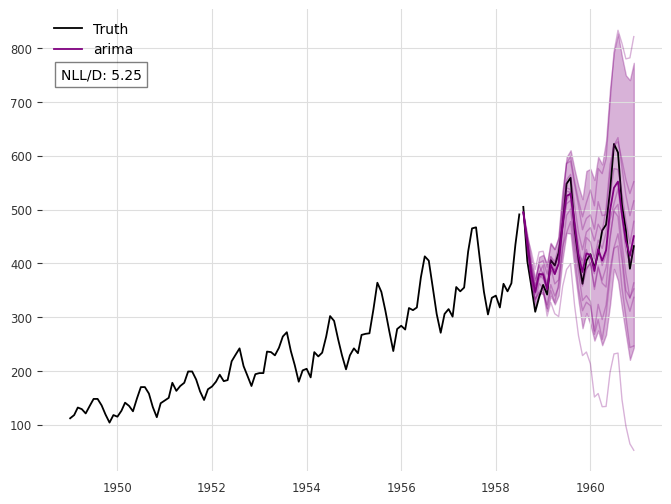

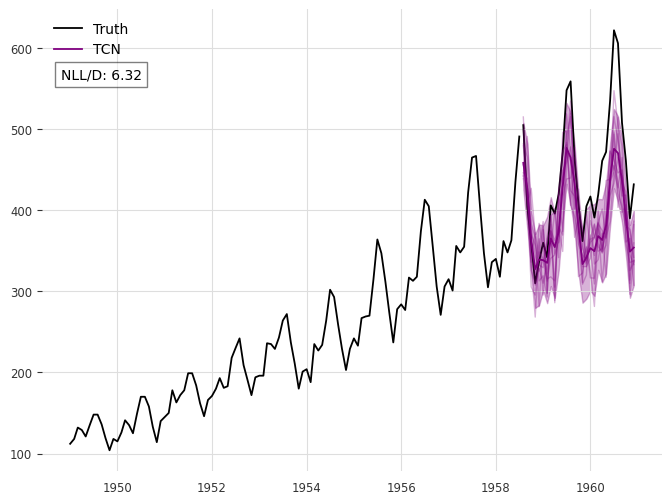

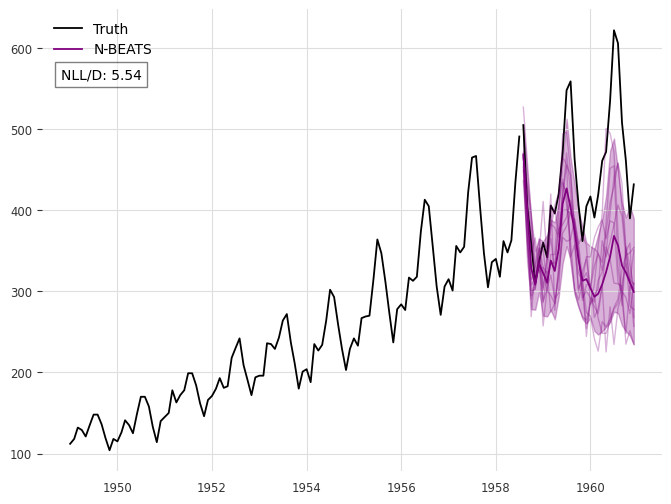

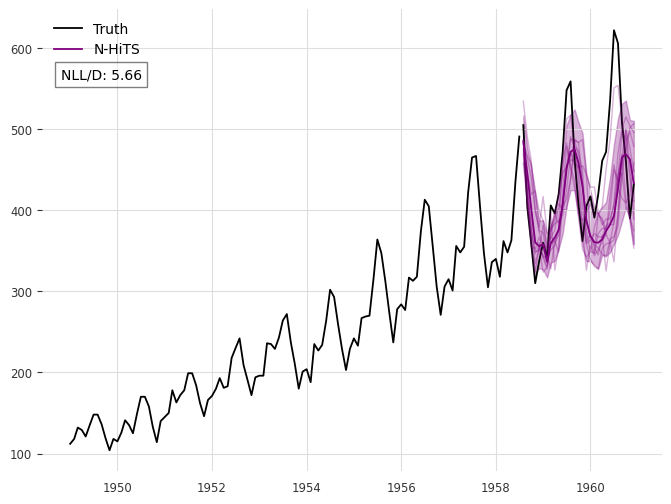

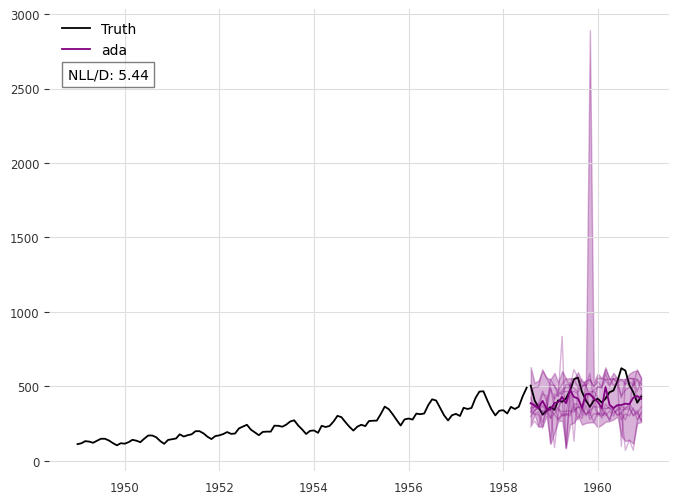

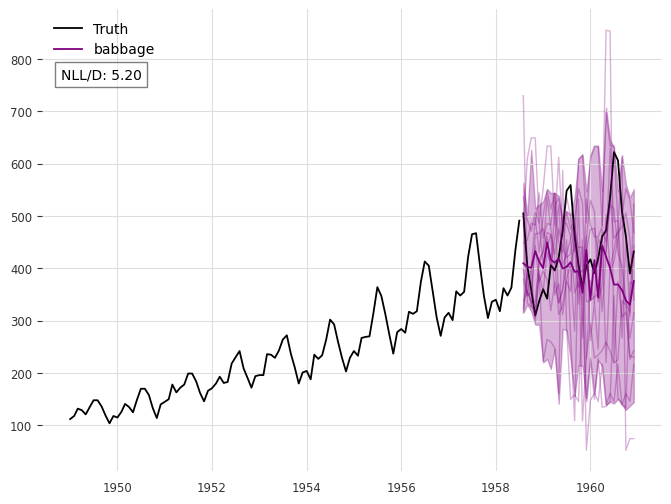

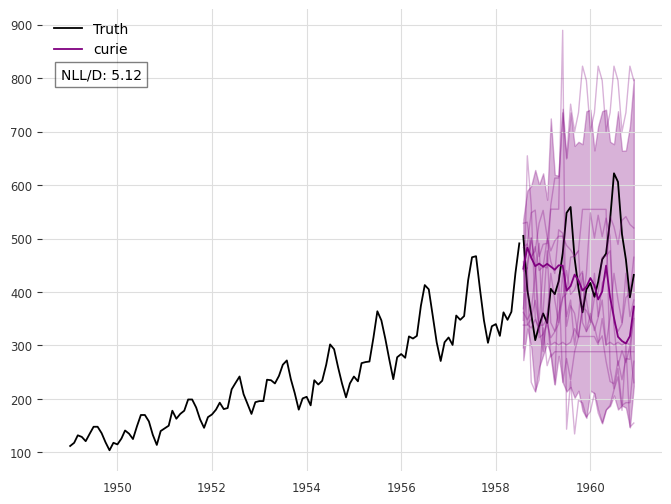

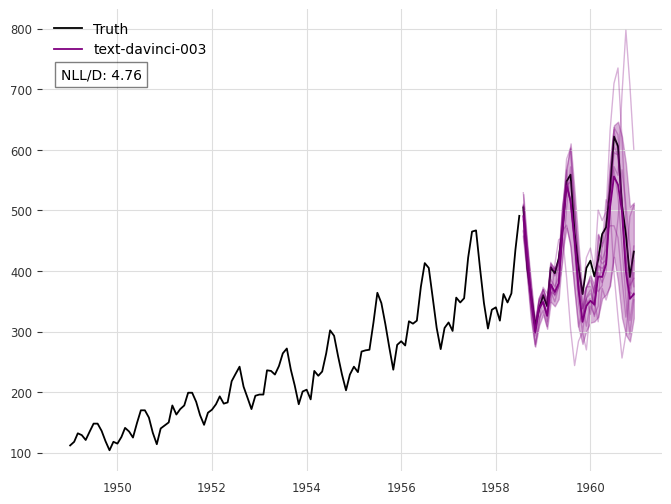

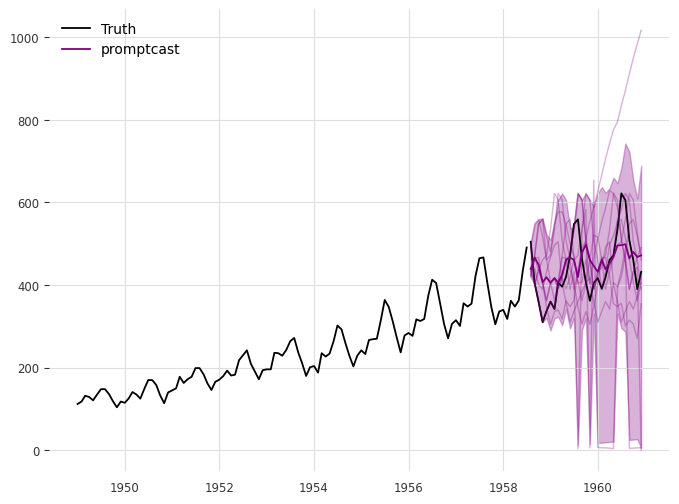

AusBeerDataset


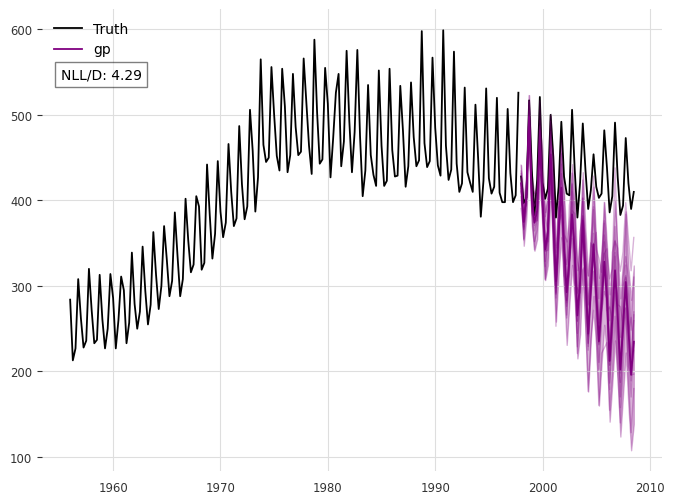

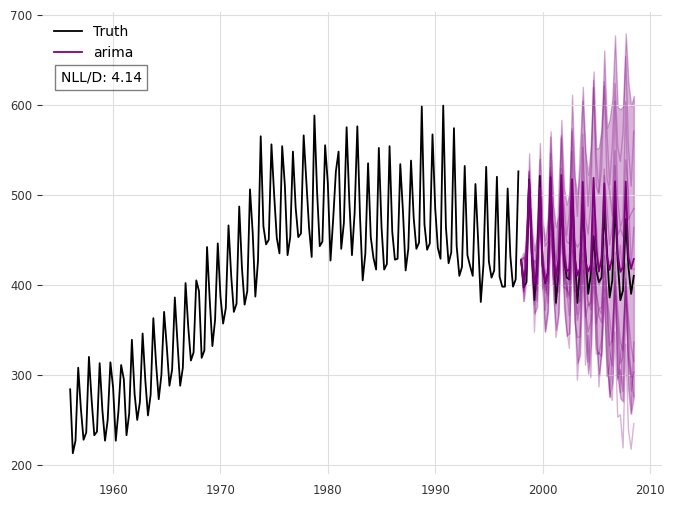

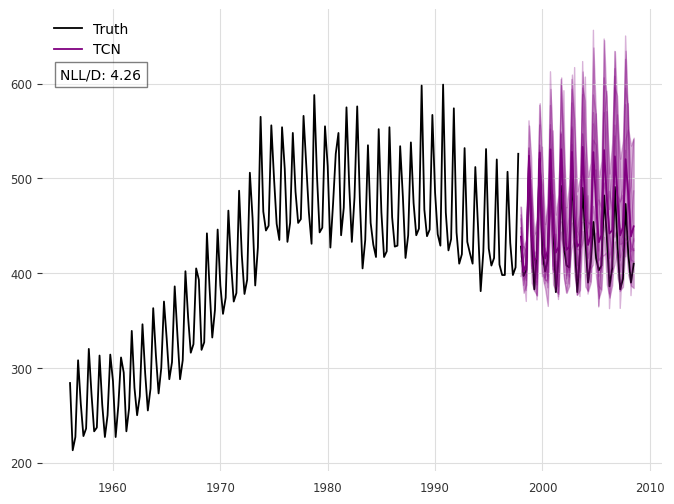

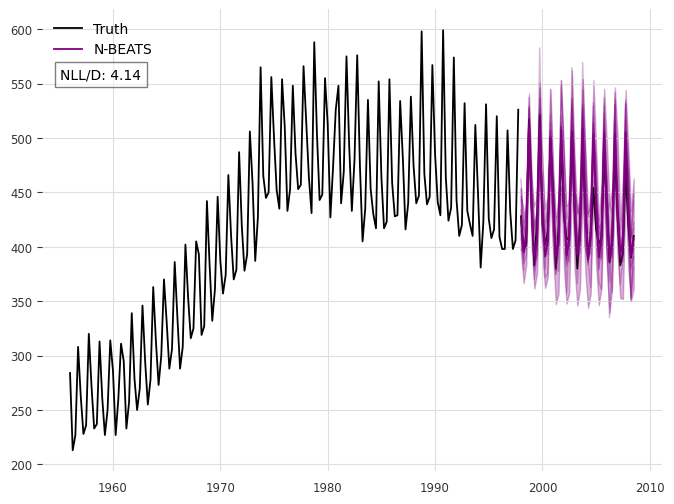

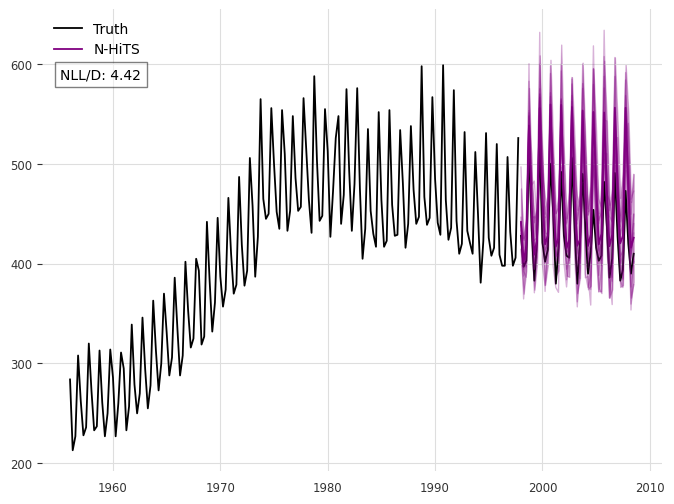

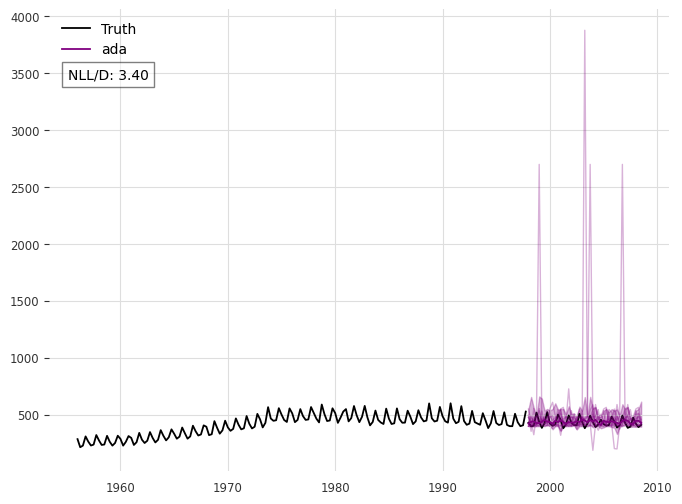

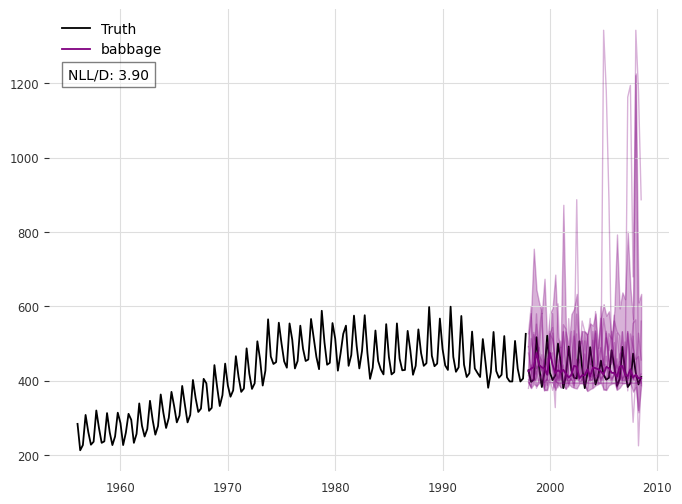

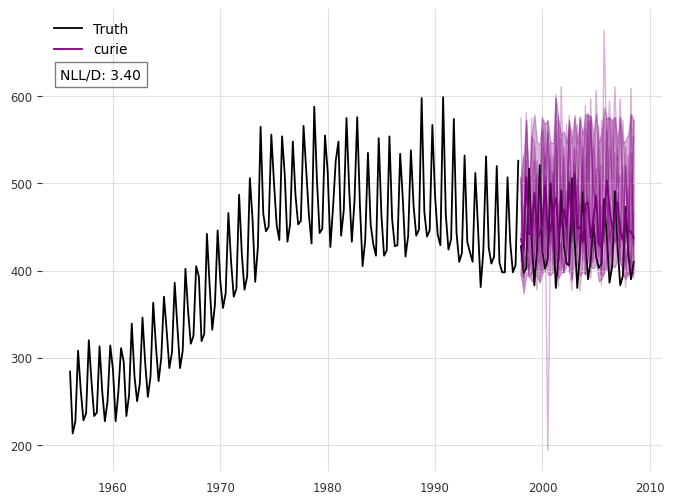

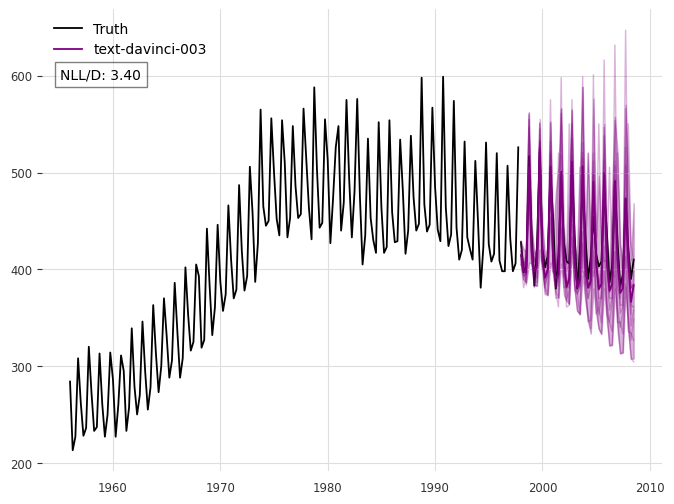

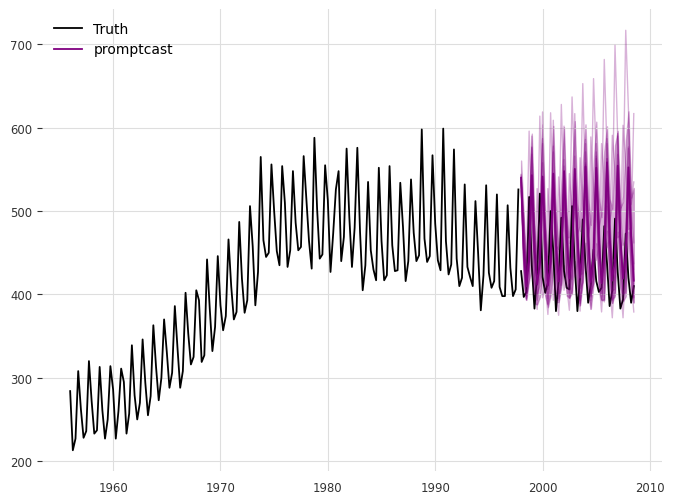

GasRateCO2Dataset


ModuleNotFoundError: No module named 'pandas.core.indexes.numeric'

In [5]:
from data.small_context import get_datasets

output_dir = 'precomputed_outputs/darts'
datasets = get_datasets()
for ds_name, data in datasets.items():
    print(ds_name)
    data = datasets[ds_name]
    train, test = data
    with open(f'{output_dir}/{ds_name}.pkl', 'rb') as f:
        out = pickle.load(f)
    for model in out:
        plot_preds(train, test, out[model], model, show_samples=True)

## Synthetic

In [12]:
from data.synthetic import get_synthetic_datasets
output_dir = 'precomputed_outputs/synthetic'
datasets = get_synthetic_datasets()
for ds_name, data in datasets.items():
    print(ds_name)
    data = datasets[ds_name]
    train, test = data
    try:
        with open(f'{output_dir}/{ds_name}.pkl', 'rb') as f:
            out = pickle.load(f)
        for model in out:
            plot_preds(train, test, out[model], model, show_samples=True)
    except:
        print('Skipping ' + ds_name)

exp
Skipping exp
x_times_sine
Skipping x_times_sine
linear
Skipping linear
log
Skipping log
beat
Skipping beat
square
Skipping square
gaussian_wave
Skipping gaussian_wave
sigmoid
Skipping sigmoid
sine
Skipping sine
sinc
Skipping sinc
xsin
Skipping xsin
linear_cos
Skipping linear_cos


## Monash

In [5]:
def plot_monash_preds(train, test, pred_dict, model_name, max_series):
    for i in range(min(max_series, len(test))):
        pred = pd.Series(pred_dict['median'][i], index=test[i].index)
        plt.figure(figsize=(8, 6), dpi=100)
        plt.plot(train[i], color='black')
        plt.plot(test[i], label='Truth', color='black')
        plt.plot(pred, label=model_name, color='purple')
        plt.legend(loc='upper left')
        ymax = max(train[i].max(), test[i].max()) * 1.1
        ymin = plt.gca().get_ylim()[0]
        plt.ylim(ymin, ymax)
        if 'NLL/D' in pred_dict:
            nll = pred_dict['NLL/D'][i]
            if nll is not None:
                plt.text(0.03, 0.85, f'NLL/D: {nll:.2f}', transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.5))
        plt.show()

Loading test sets from datasets/monash
bitcoin
Skipping bitcoin
solar_weekly


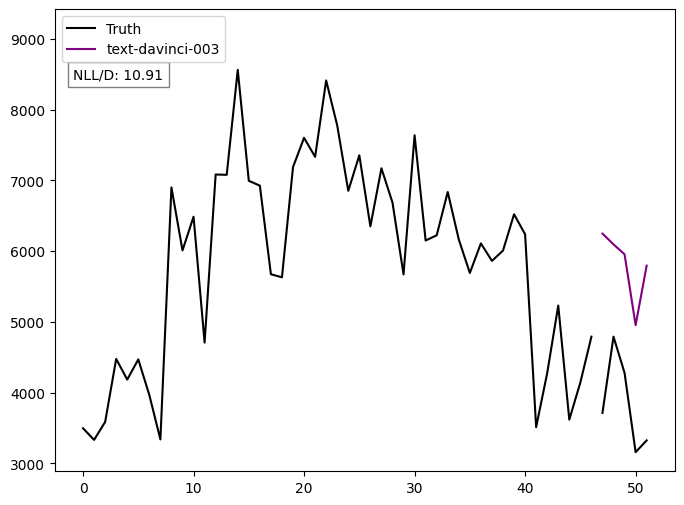

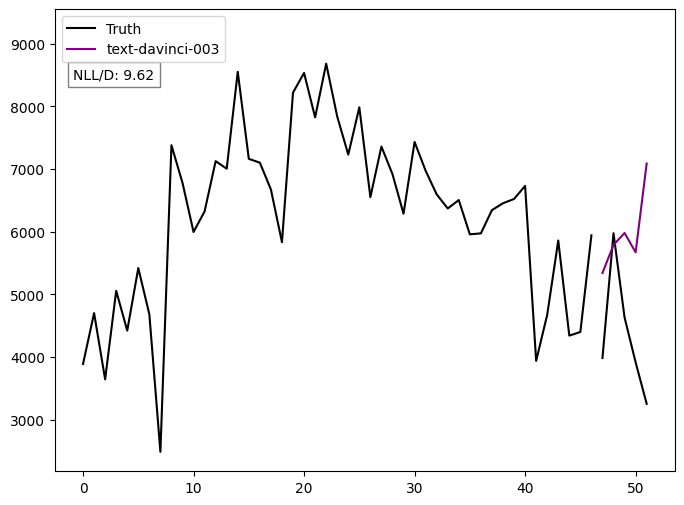

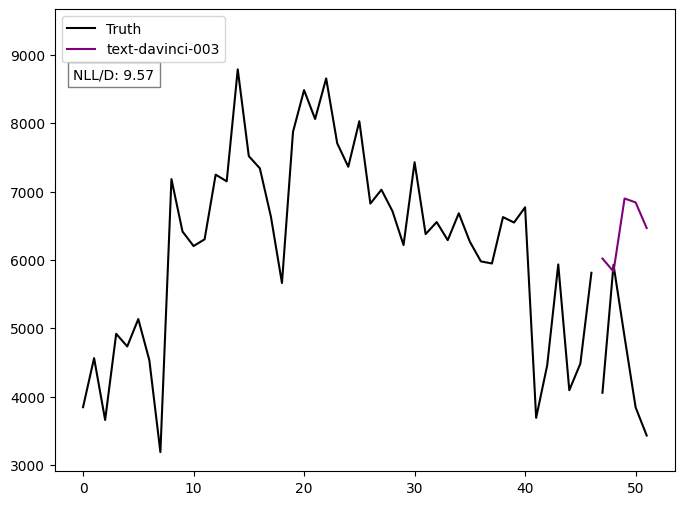

hospital


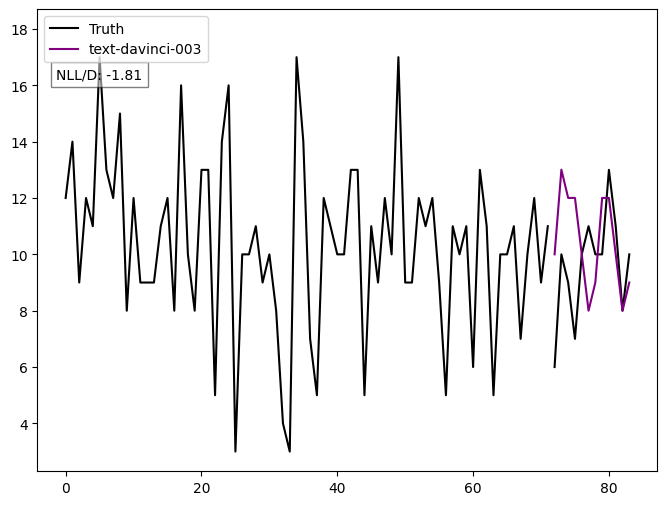

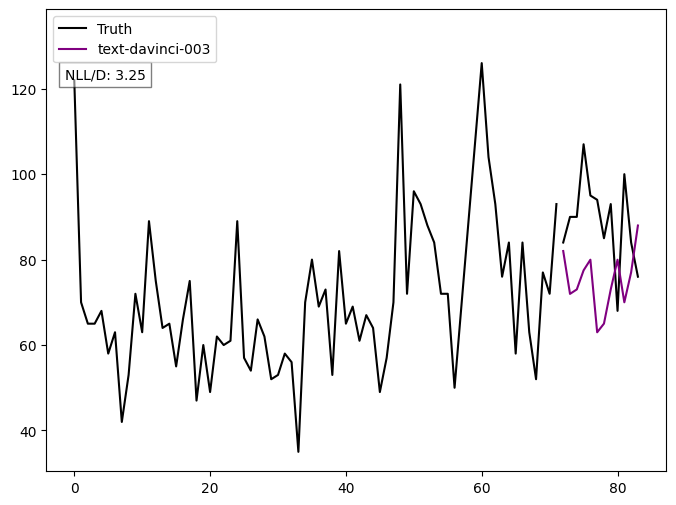

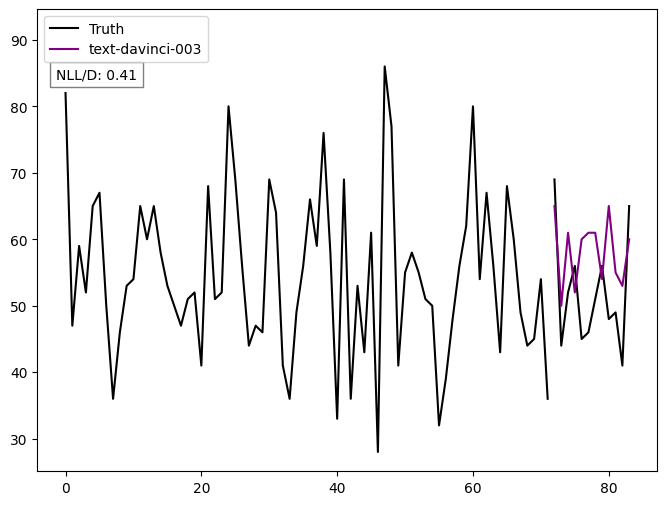

saugeenday


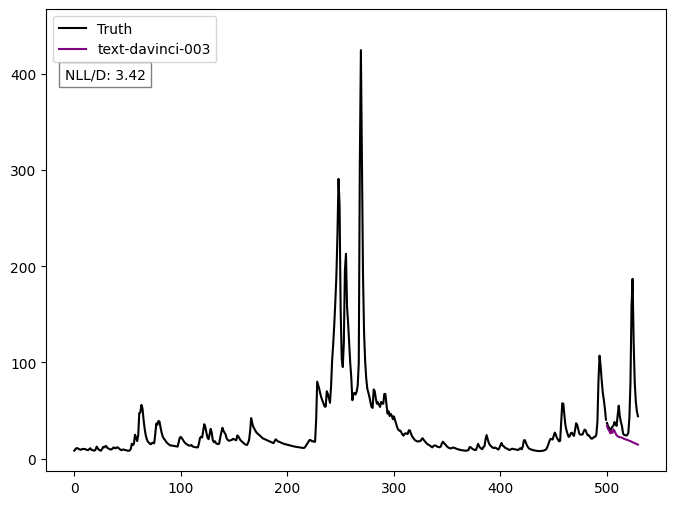

tourism_monthly


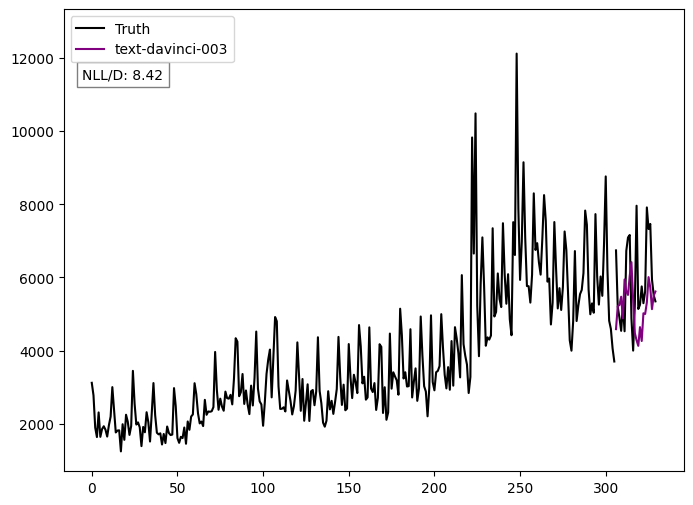

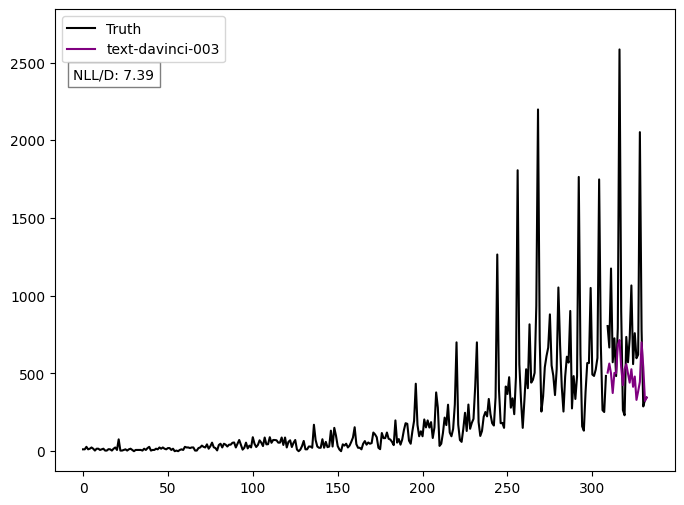

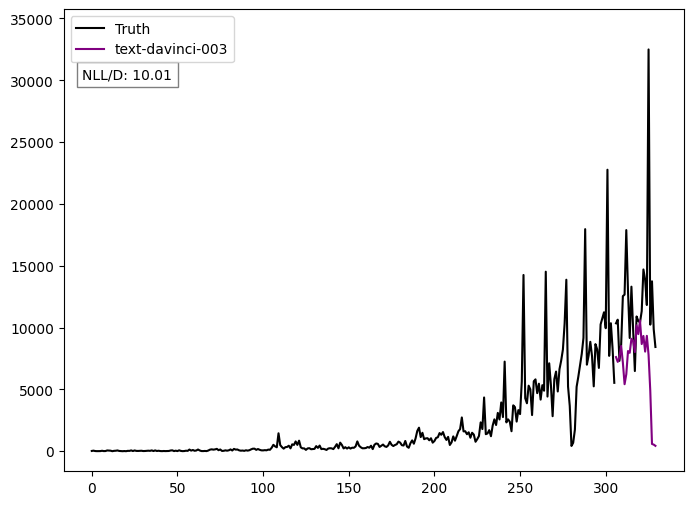

us_births


australian_electricity_demand
Skipping australian_electricity_demand
weather


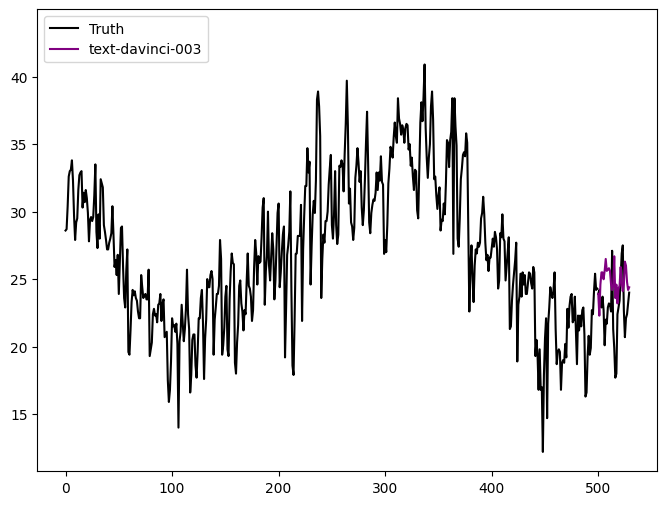

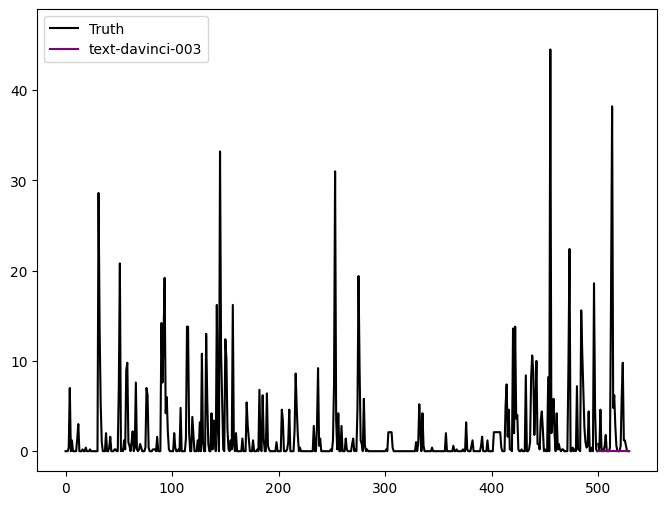

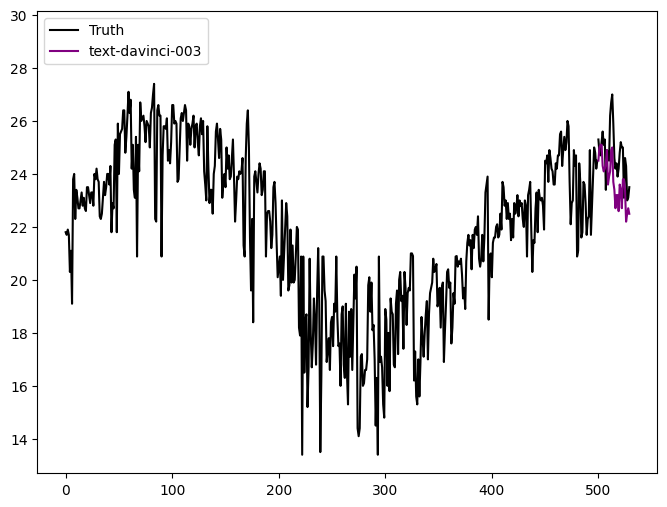

tourism_yearly


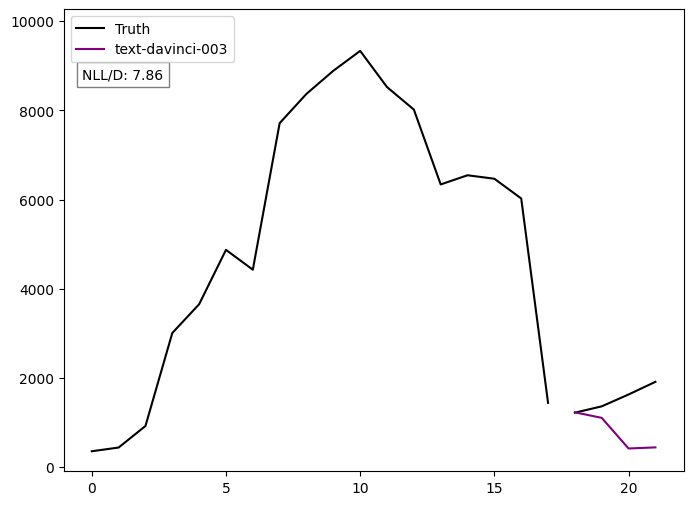

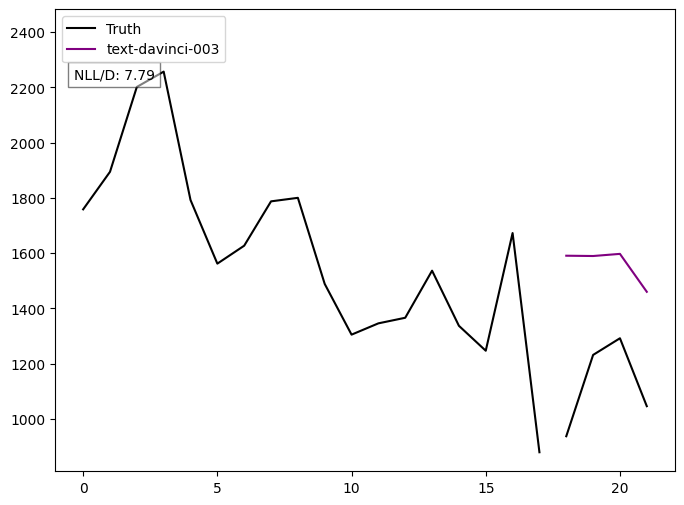

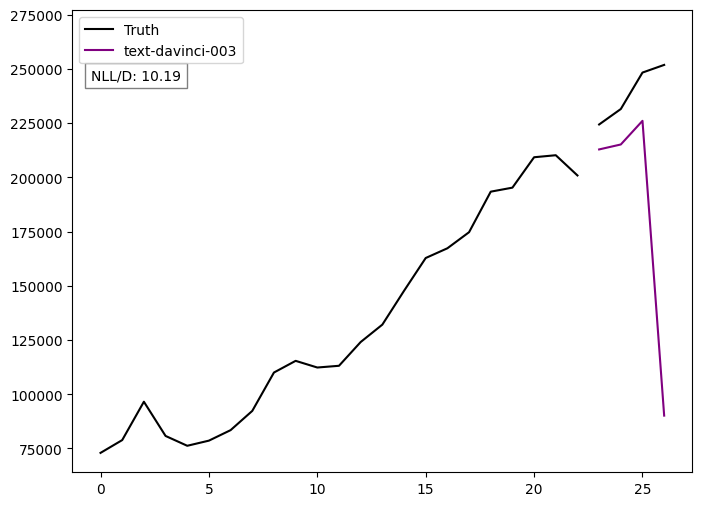

tourism_quarterly


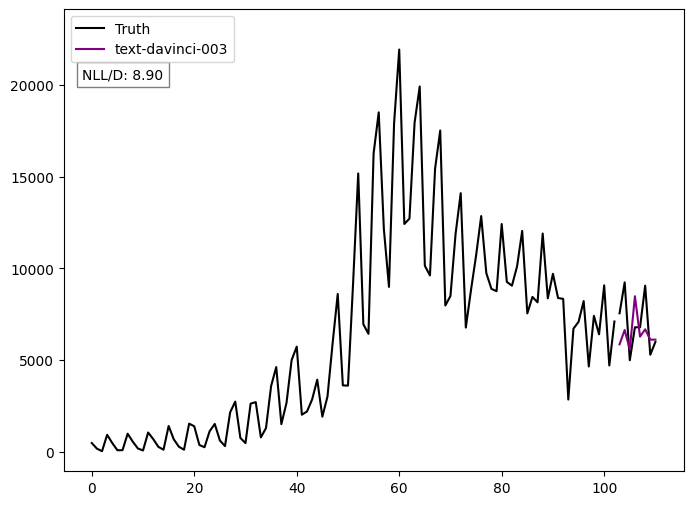

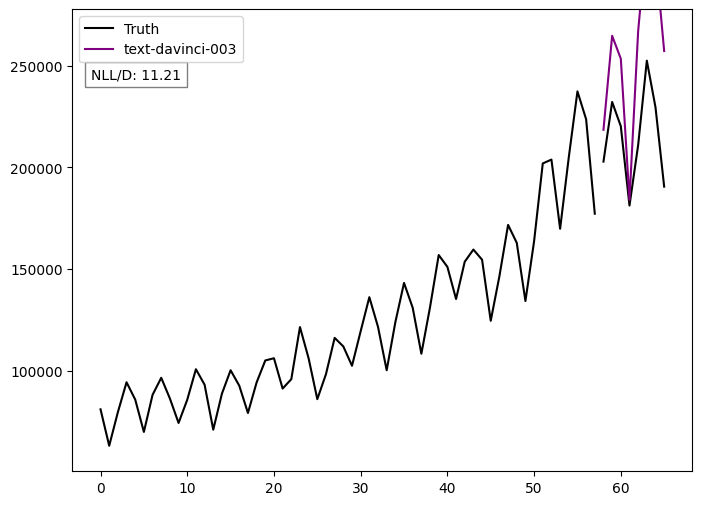

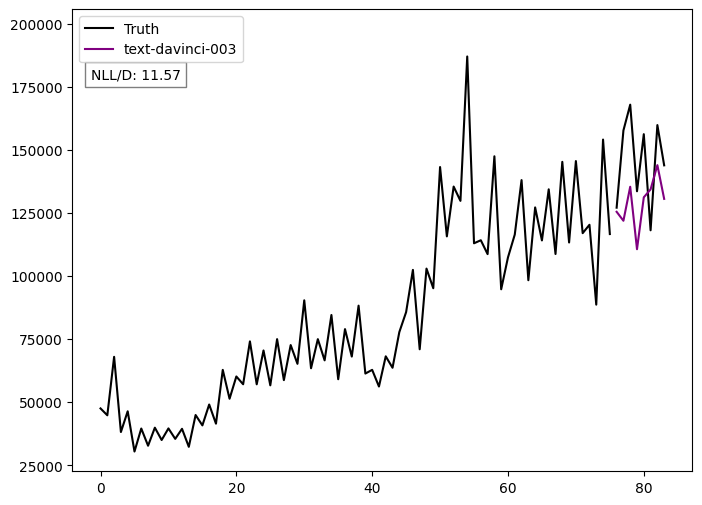

nn5_weekly


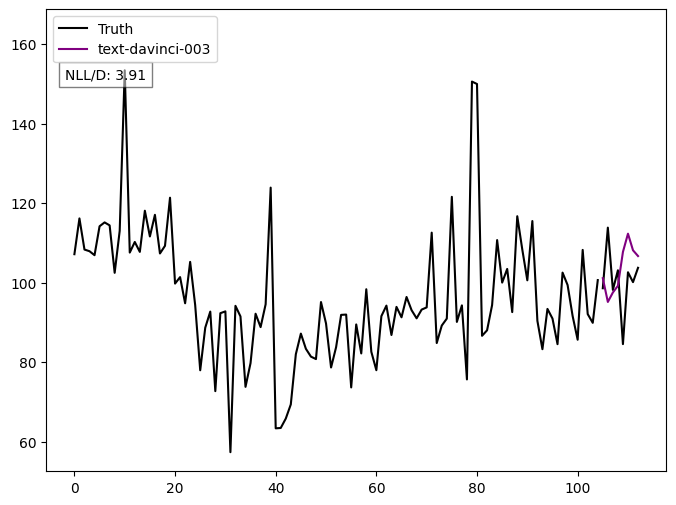

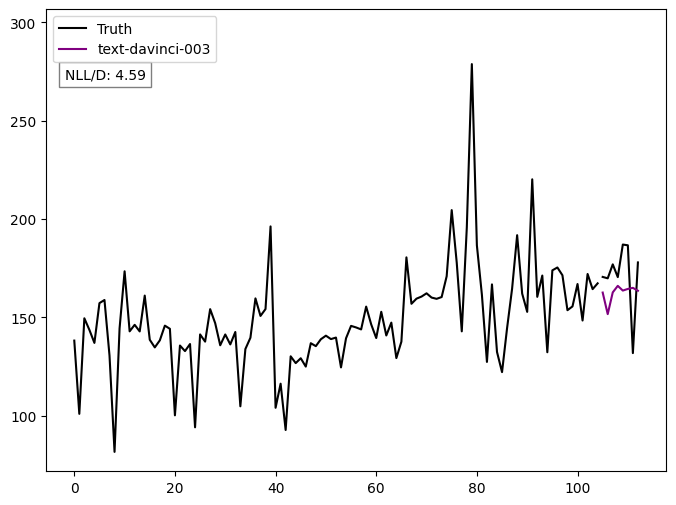

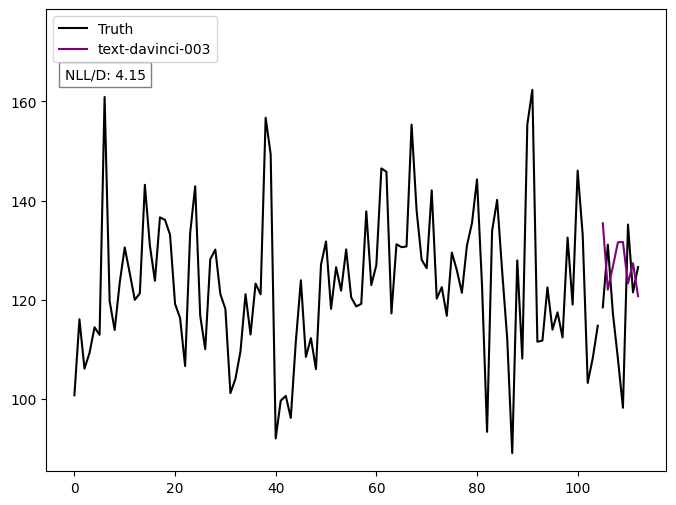

sunspot
Skipping sunspot
covid_deaths


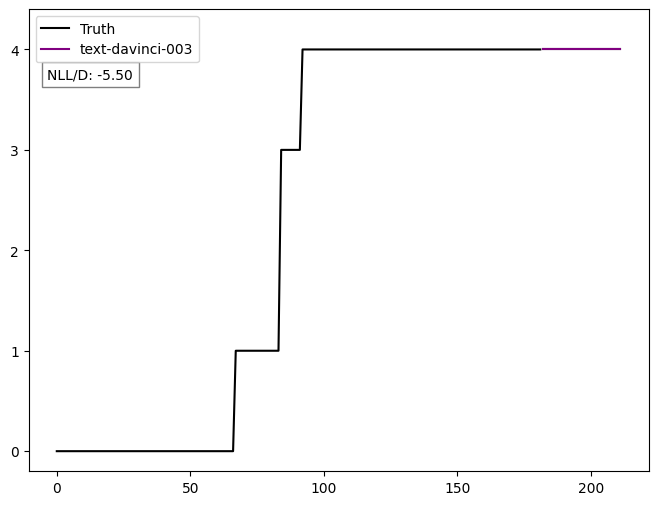

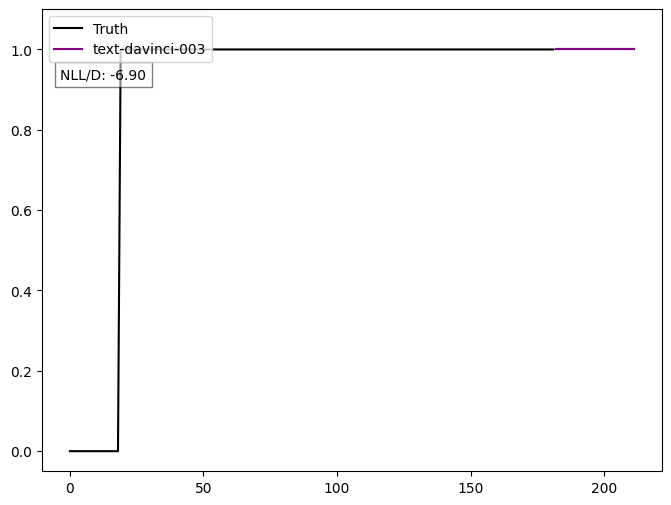

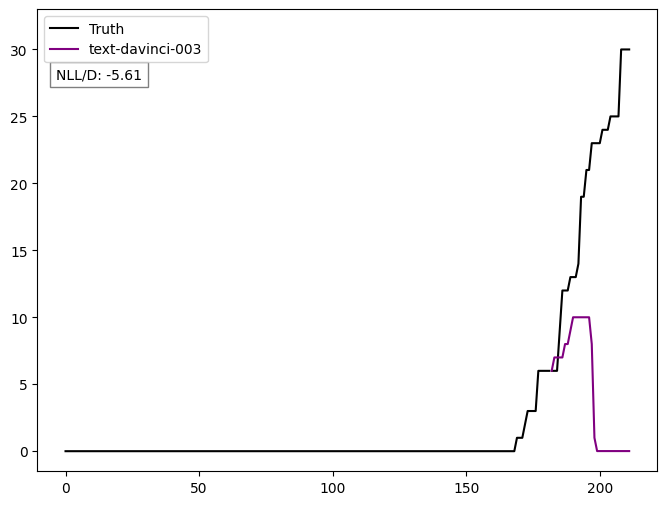

nn5_daily
Skipping nn5_daily
fred_md


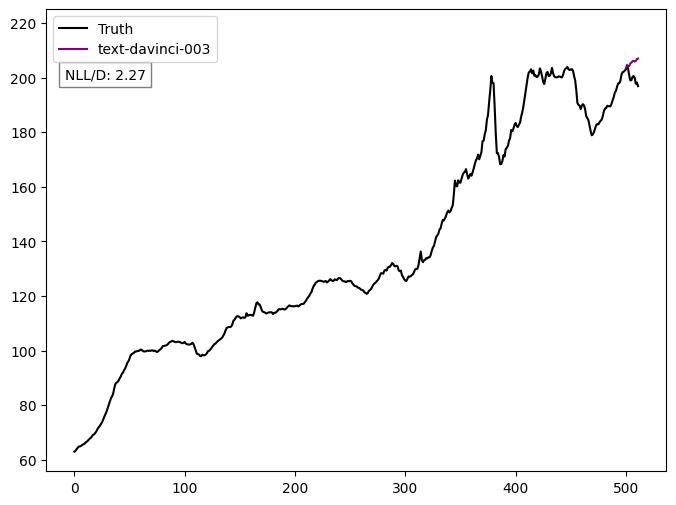

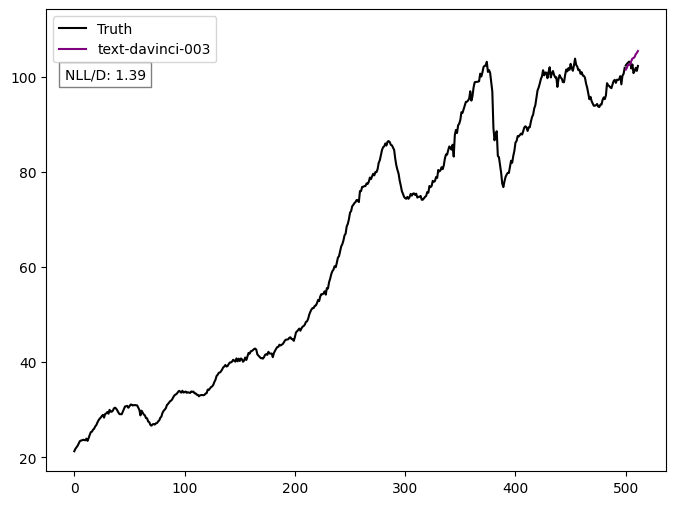

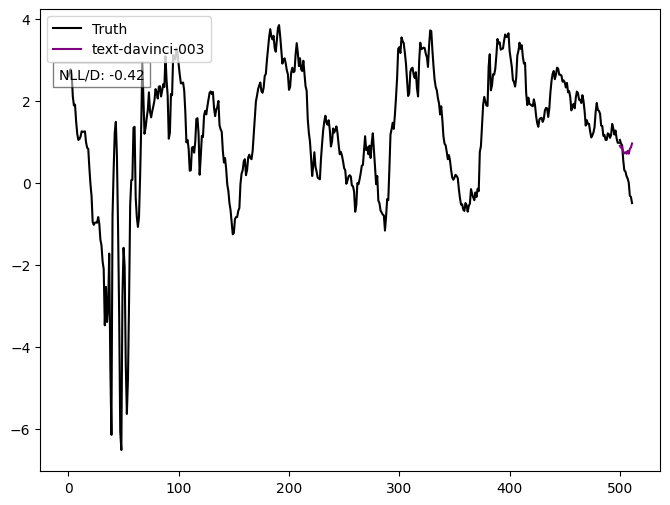

traffic_weekly


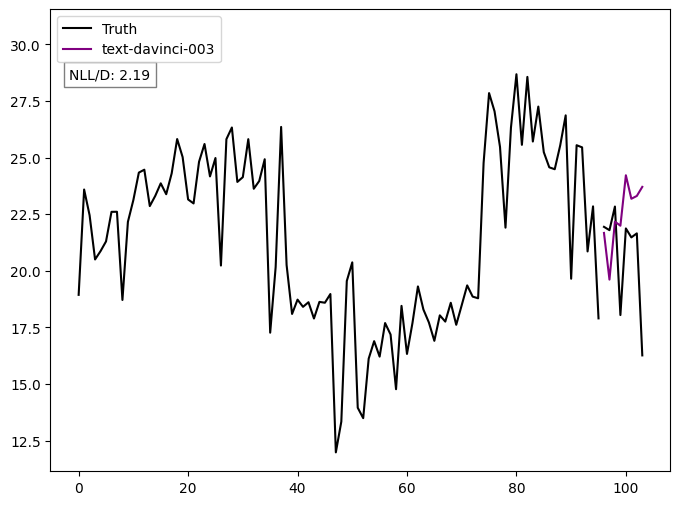

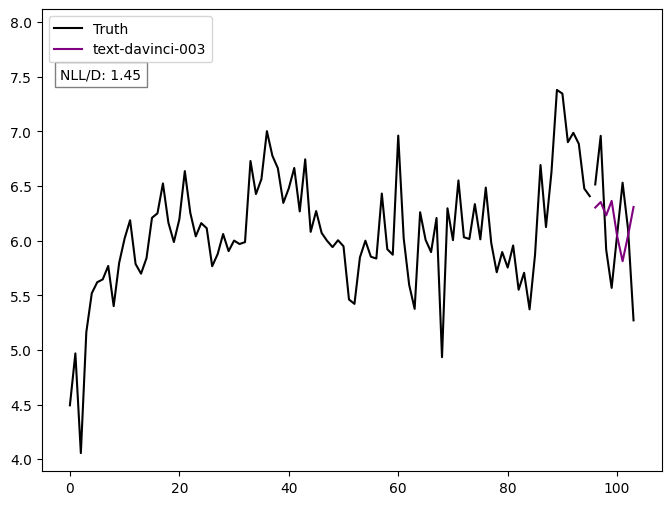

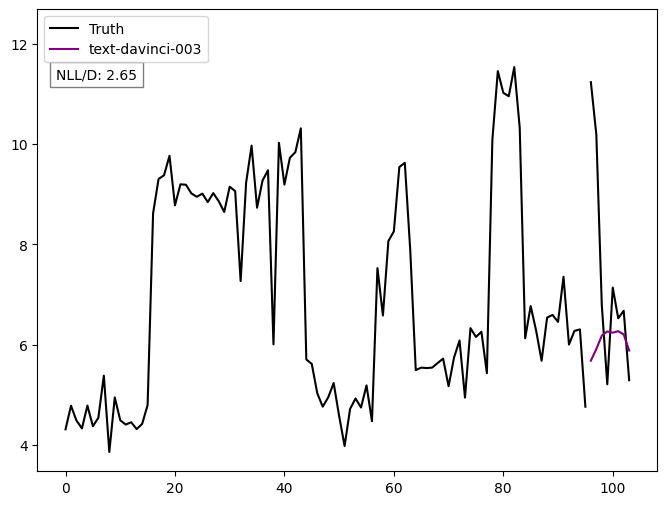

traffic_hourly
Skipping traffic_hourly
solar_10_minutes


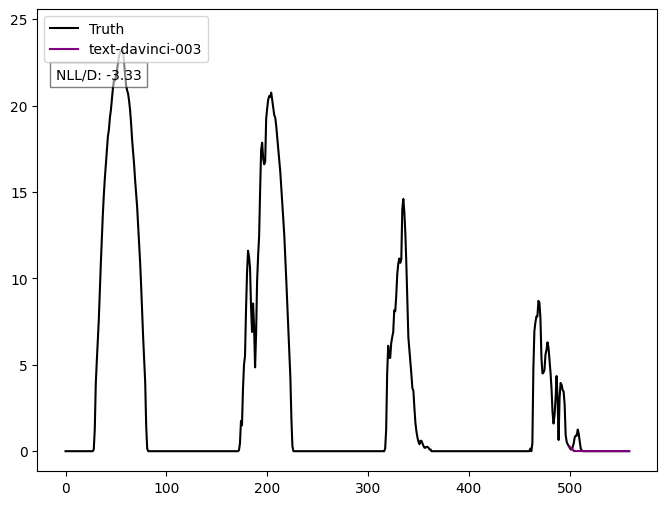

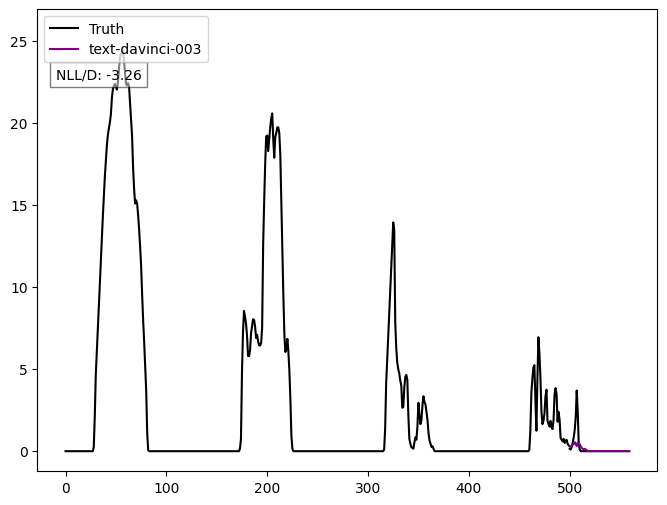

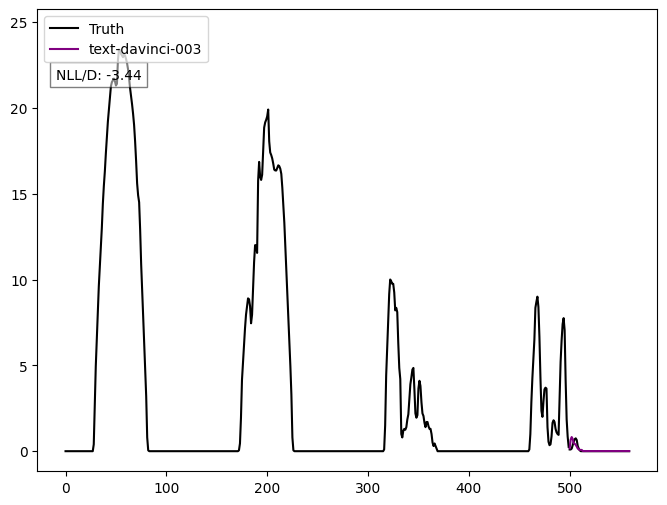

pedestrian_counts
Skipping pedestrian_counts
cif_2016


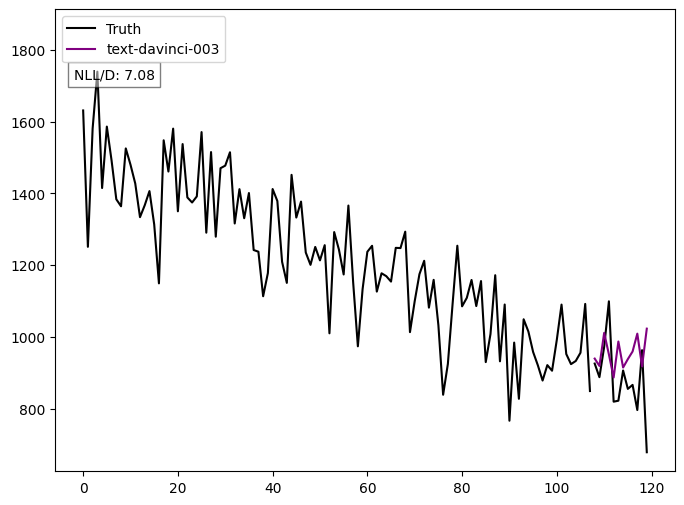

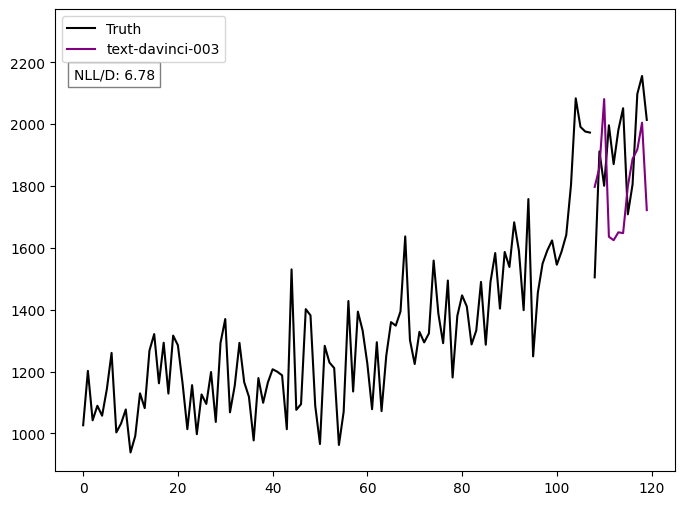

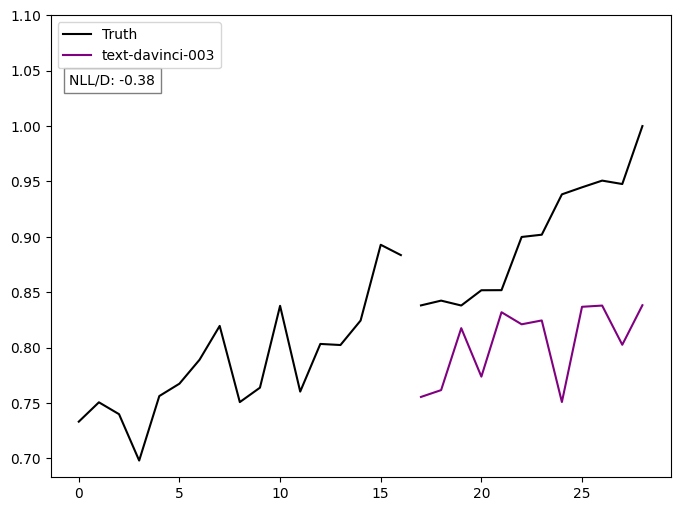

In [9]:
from data.monash import get_datasets
output_dir = 'precomputed_outputs/monash'
max_history_len = 500
datasets = get_datasets()
for ds_name, data in datasets.items():
    if not os.path.exists(f'{output_dir}/{ds_name}.pkl'):
        continue
    print(ds_name)
    data = datasets[ds_name]
    train, test = data
    train = [x[-max_history_len:] for x in train]
    # turn into pd series
    train = [pd.Series(train[i], index=pd.RangeIndex(len(train[i]))) for i in range(len(train))]
    test = [pd.Series(test[i], index=pd.RangeIndex(len(train[i]), len(train[i]) + len(test[i]))) for i in range(len(test))]
    
    try:
        with open(f'{output_dir}/{ds_name}.pkl', 'rb') as f:
            out = pickle.load(f)
        for model in out:
            plot_monash_preds(train, test, out[model], model, max_series=3)
    except:
        print('Skipping ' + ds_name)

Loading test sets from datasets/monash
nn5_daily
{'samples': [         500        501        502        503        504        505  \
0  14.055054  10.652775   7.211389  15.541107  13.937734   8.267269   
1  17.926613   8.541016   9.479575   9.362255  13.507561  14.915401   
2  12.569001   6.272830   8.932082   8.853869  11.043842  10.809202   
3  10.261709   9.166722  12.060615  16.792520  14.915401   7.289603   
4  15.541107  22.971372  18.083040  12.373468  19.999266  18.083040   

         506        507        508        509  ...        546        547  \
0  10.848308   9.049402  12.647215  23.088691  ...   7.602456  16.284133   
1   9.714215  11.513122  12.569001  18.552319  ...   9.440469  10.730988   
2  12.295255  20.742292  11.474015   8.071736  ...  18.786959  15.736640   
3   9.479575  13.781308   7.054963   9.362255  ...  10.105282  19.569092   
4  12.451681   9.831535  12.138828   9.636002  ...  12.021508  13.077388   

         548        549        550        551        5

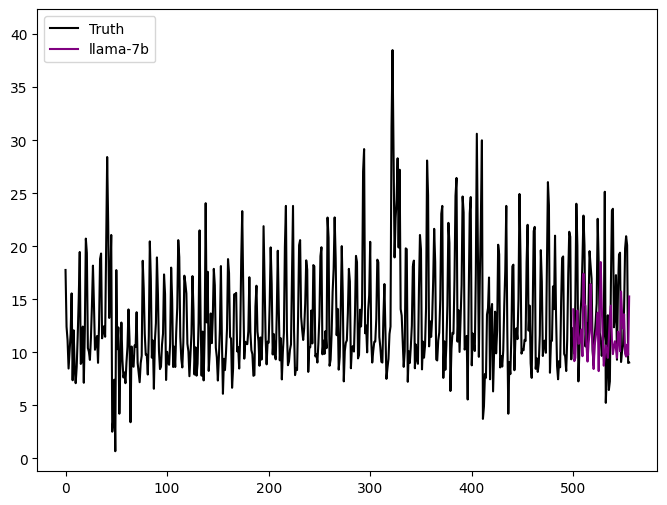

In [14]:
from data.monash import get_datasets
output_dir = 'outputs/wanT'
max_history_len = 500
datasets = get_datasets()
for ds_name, data in datasets.items():
    if ds_name == 'nn5_daily':
        print(ds_name)
        data = datasets[ds_name]
        train, test = data
        train = [x[-max_history_len:] for x in train]
        # turn into pd series
        train = [pd.Series(train[i], index=pd.RangeIndex(len(train[i]))) for i in range(len(train))]
        test = [pd.Series(test[i], index=pd.RangeIndex(len(train[i]), len(train[i]) + len(test[i]))) for i in range(len(test))]

        try:
            with open(f'{output_dir}/nn5_daily_llama.pkl', 'rb') as f:
                out = pickle.load(f)
            for model in out:
                print(out[model])
                plot_monash_preds(train, test, out[model], model, max_series=3)
        except:
            print('Skipping ' + ds_name)